## Titanic Data Analysis

###  Importing Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading data

In [88]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking missing data

In [89]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

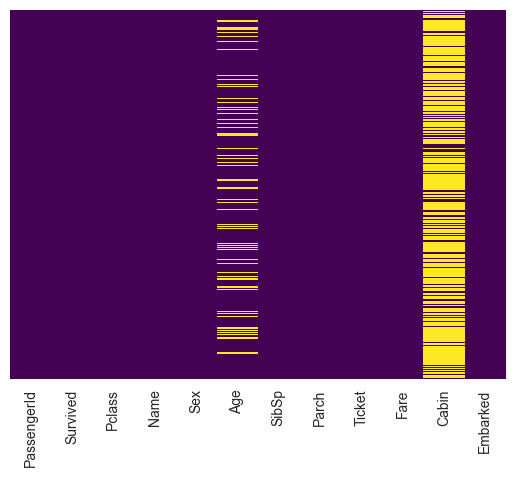

In [90]:
## visualizing missing data
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

Roughly 20% of the Age data is missing.The preposition of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin known: 1 or 0"



<Axes: xlabel='Survived', ylabel='count'>

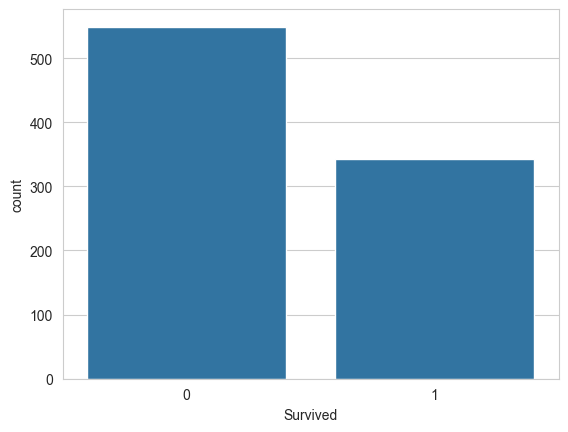

In [91]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

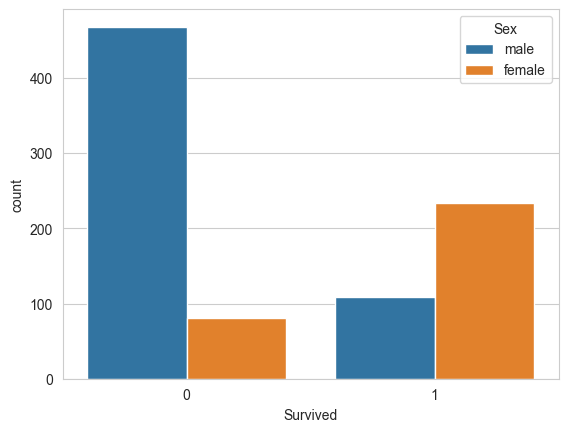

In [92]:
# sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

<Axes: xlabel='Survived', ylabel='count'>

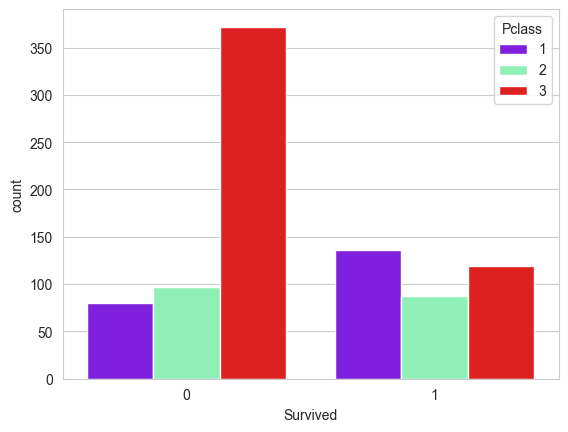

In [93]:
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

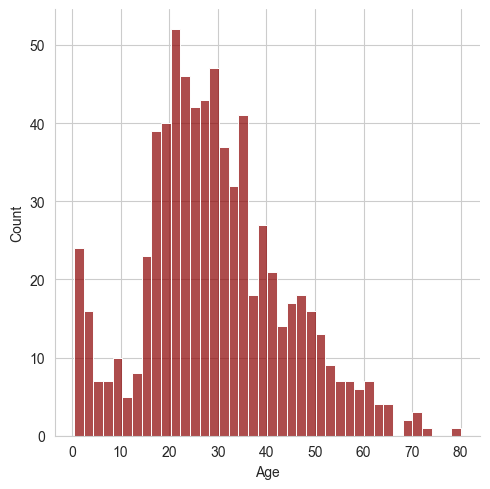

In [94]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred', bins=40,alpha=0.7)

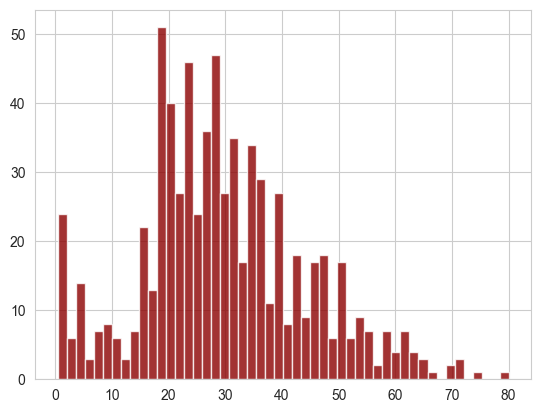

In [95]:
# we can plot same distplot using matplotlib's histogram
plt.hist(train['Age'].dropna(),bins=50,  color='darkred',alpha=0.8);


<Axes: xlabel='SibSp', ylabel='count'>

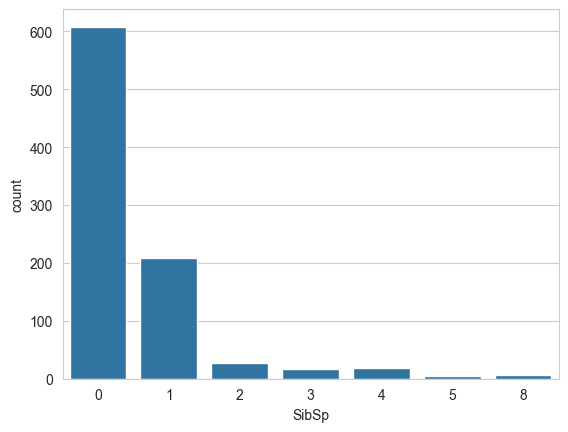

In [96]:
sns.countplot(x='SibSp',data=train)

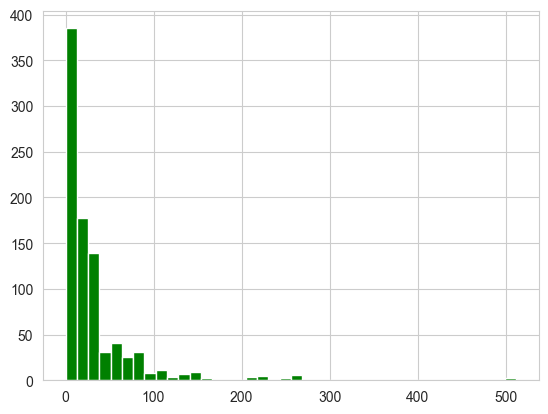

In [97]:
plt.hist(train['Fare'].dropna(),color='green',bins=40);

### Data Cleaning

Instead of just dropping the Age data rows, we will fill the mean of age of all passengers (imputation). However, we will first check average age by passenger class

C:\Users\Windows\AppData\Local\Temp\ipykernel_4028\4092013579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter');


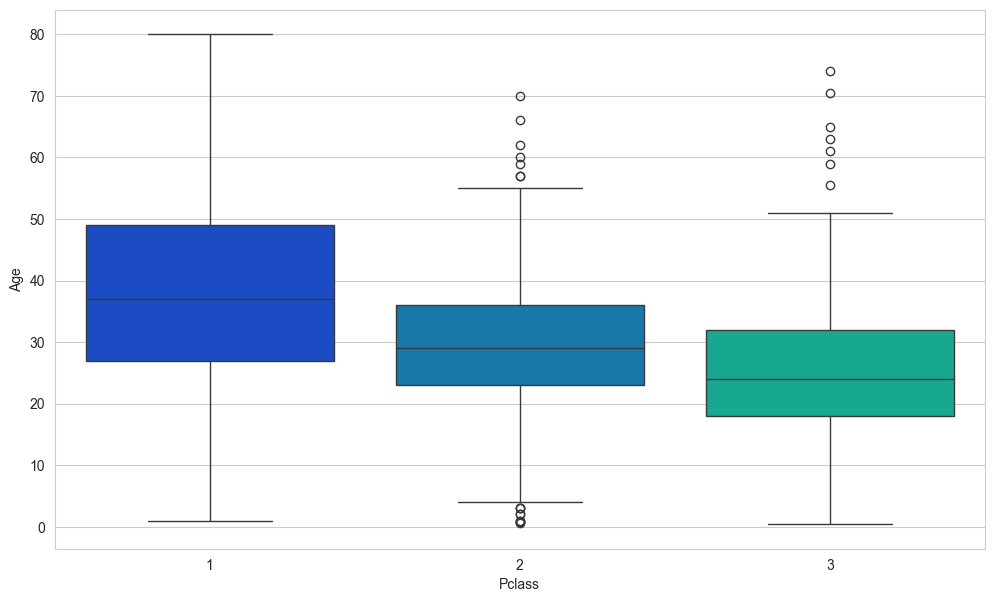

In [98]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter');

We can see the class 1 passengers are older compared to other classes. We  will use these average age values to impute

In [99]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):

        if Pclass==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age


In [100]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\Windows\AppData\Local\Temp\ipykernel_4028\128768181.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\Windows\AppData\Local\Temp\ipykernel_4028\128768181.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

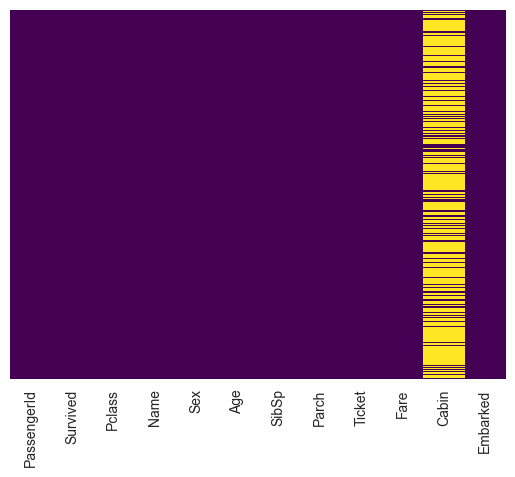

In [101]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

Only Cabin has null values now, we will drop Cabin column as it has many null values

In [102]:
train.drop('Cabin',axis=1,inplace=True)

In [103]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

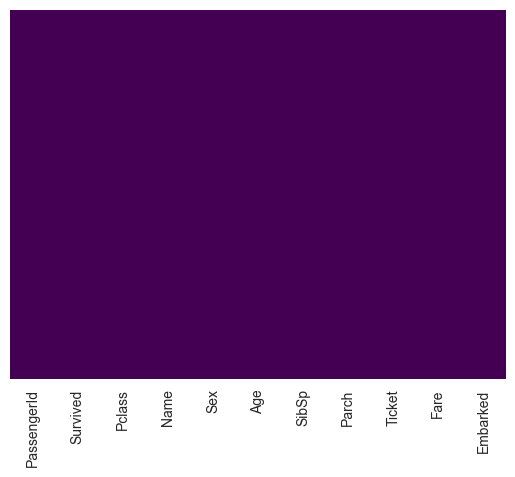

In [104]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

### Converting Categorical Features

Coverting categorical features to dummy variables using pandas. Otherwise, machine learning algorithm will not be able to take the values as inputs.

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [106]:
sex= pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [107]:
train.drop(['Sex','Embarked','Ticket'],axis=1,inplace=True)

In [114]:
train.drop(['Name'],axis=1,inplace=True)

In [108]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500


In [109]:
train =pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,False,True


In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   male         891 non-null    bool   
 9   Q            891 non-null    bool   
 10  S            891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(1)
memory usage: 58.4+ KB


### Building a Logistic Regression Model

#### Train Test split

In [115]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [116]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'],
                                                    test_size=0.30,
                                                    random_state=42)

### Importing and training Model

In [123]:
from sklearn.linear_model import LogisticRegression

In [125]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

e:\Amit\Projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
predictions = logmodel.predict(X_test)

In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
accuracy = confusion_matrix(y_test,predictions)

In [132]:
accuracy

array([[137,  20],
       [ 35,  76]], dtype=int64)

In [133]:
from sklearn.metrics import accuracy_score

In [134]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7947761194029851